In [1]:
import os
import nltk
import wordcloud
import json
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as en_stopwords
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stopwords
from spacy.lang.es.stop_words import STOP_WORDS as es_stopwords
import sys
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
def get_stopwords(lang):
    if lang == 'english':
        df_stopwords = set(en_stopwords)
        custom_stopwords = set(['olympics', 'olympic', 'london',
                                'rio', 'legacy', '2012', '2016',
                                'said', 'caption', 'image', 'years',
                                'd','s','t','m','n','ve', 'll', 'xe2', 'x80', 'x99', 'x99s', 'nthe', 'lda', '000', 'xc2'])
        return df_stopwords | custom_stopwords
    elif lang == 'portuguese':
        df_stopwords = set(pt_stopwords)
        custom_stopwords = set(['legado', 'olimpico', 'london',
                                'olímpica', 'londres', 'rio', 'legado',
                                'olímpico', '2012', '2016'])
        return df_stopwords | custom_stopwords
    
    
def my_tokenizers(doc):
    words = nltk.word_tokenize(doc)
    return [word for word in words if len(word) > 2]

def get_top_n_words(corpus, stopwords, n=20):
    vec = CountVectorizer(stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, stopwords, n=20):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_words_tfidf(corpus, stopwords, n=20):
    vec = TfidfVectorizer(stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram_tfidf(corpus, stopwords, n=20):
    vec = TfidfVectorizer(ngram_range=(2, 2), stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [146]:
lang = 'english'
directory = 'g-dailymail'

In [147]:
directory1 = 'bbc'
directory2 = 'businessinsider'
directory3 = 'buzzfeed'
directory4 = 'citymonitor'
directory5 = 'gamesmonitor'
directory6 = 'guardian'
directory7 = 'independentgoogle'
directory8 = 'itv'
directory9 = 'metro'
directory10 = 'queenelizabetholympicpark'
directory11 = 'sky'
directory12 = 'sun'
directory13 = 'theconversation'
directory14 = 'theindependent'
directory15 = 'uksport'
directory16 = 'g-bbc'
directory17 = 'g-dailymail'
directory18 = 'g-telegraph'
directory19 = 'g-guardian'




localolympics = './data/' + directory + '/olympic-articles/'
localolympic1 = './data/' + directory1 + '/data_analysis/'
localolympic2 = './data/' + directory2 + '/data_analysis/'
localolympic3 = './data/' + directory3 + '/data_analysis/'
localolympic4 = './data/' + directory4 + '/data_analysis/'
localolympic5 = './data/' + directory5 + '/data_analysis/'
localolympic6 = './data/' + directory6 + '/data_analysis/'
localolympic7 = './data/' + directory7 + '/data_analysis/'
localolympic8 = './data/' + directory8 + '/data_analysis/'
localolympic9 = './data/' + directory9 + '/data_analysis/'
localolympic10 = './data/' + directory10 + '/data_analysis/'
localolympic11 = './data/' + directory11 + '/data_analysis/'
localolympic12 = './data/' + directory12 + '/data_analysis/'
localolympic13 = './data/' + directory13 + '/data_analysis/'
localolympic14 = './data/' + directory14 + '/data_analysis/'
localolympic15 = './data/' + directory15 + '/data_analysis/'
localolympic16 = './data/' + directory16 + '/data_analysis/'
localolympic17 = './data/' + directory17 + '/data_analysis/'
localolympic18 = './data/' + directory18 + '/data_analysis/'
localolympic19 = './data/' + directory19 + '/data_analysis/'


In [148]:
#---------- CREATE JOIN FILES ----------#

for file in os.listdir(localolympics):
    with open(os.path.join(localolympics + file), 'r', encoding='utf8') as myfileteste: 
        contentfile = myfileteste.read()
        with open(os.path.join(localolympic17 + 'all_texts_together' + directory + '.txt'), 'a', encoding='utf8') as file1:
            file1.write(str(contentfile))
                

In [139]:
#---------- CREATE JOIN FILES ----------#

for filename in os.listdir(localolympics):
    if filename.endswith(".txt"): 
        with open(os.path.join(localolympics + filename), 'r', encoding='utf8') as myfileteste: 
            contentfile = myfileteste.read()
            with open(os.path.join(localolympic18 + 'all_texts_together' + directory + '.txt'), 'a', encoding='utf8') as file1:
                file1.write(str(contentfile))
                file1.close

In [63]:
print(content10)

b'In the lead up to Liverpool 2008, European Capital of Culture and the London 2012 Olympic Games, CCPR is developing its major events research strand with a mixture of academic and commissioned projects and a particular focus on Olympic-related research.\r\nJobs\r\nhttp://www.youngfoundation.org.uk/index.php\r\nThis report provides useful information on the state of knowledge and preparation for the Olympics of two important, predominantly Asian retail and catering streets in London\xe2\x80\x99s East End. As the report describes,these two streets, one in Tower Hamlets and one in Newham, could be affected by the impact of the Olympics for better or for worse. The report analyses what local retailers believe will happen to their street and to themselves. It also points to some of the possible hazards brought about by successful regeneration, in particular the danger of large retail chains driving out small independent and family-based businesses.\r\nSkills\r\nhttp://www.hlst.heacademy.a

In [149]:
with open(os.path.join(localolympic1 + 'all_texts_together' + directory1 + '.txt'), 'r', encoding= 'utf8') as myfile1:
    content1 = myfile1.read()
with open(os.path.join(localolympic2 + 'all_texts_together' + directory2 + '.txt'), 'r', encoding= 'utf8') as myfile2:
    content2 = myfile2.read()
with open(os.path.join(localolympic3 + 'all_texts_together' + directory3 + '.txt'), 'r', encoding= 'utf8') as myfile3:
    content3 = myfile3.read()
with open(os.path.join(localolympic4 + 'all_texts_together' + directory4 + '.txt'), 'r', encoding= 'utf8') as myfile4:
    content4 = myfile4.read()
with open(os.path.join(localolympic5 + 'all_texts_together' + directory5 + '.txt'), 'r', encoding= 'utf8') as myfile5:
    content5 = myfile5.read()
with open(os.path.join(localolympic6 + 'all_texts_together' + directory6 + '.txt'), 'r', encoding= 'utf8') as myfile6:
    content6 = myfile6.read()
with open(os.path.join(localolympic7 + 'all_texts_together' + directory7 + '.txt'), 'r', encoding= 'utf8') as myfile7:
    content7 = myfile7.read()
with open(os.path.join(localolympic8 + 'all_texts_together' + directory8 + '.txt'), 'r', encoding= 'utf8') as myfile8:
    content8 = myfile8.read()
with open(os.path.join(localolympic9 + 'all_texts_together' + directory9 + '.txt'), 'r', encoding= 'utf8') as myfile9:
    content9 = myfile9.read()
with open(os.path.join(localolympic10 + 'all_texts_together' + directory10 + '.txt'), 'r', encoding= 'utf8') as myfile10:
    content10 = myfile10.read()
with open(os.path.join(localolympic11 + 'all_texts_together' + directory11 + '.txt'), 'r', encoding= 'utf8') as myfile11:
    content11 = myfile11.read()
with open(os.path.join(localolympic12 + 'all_texts_together' + directory12 + '.txt'), 'r', encoding= 'utf8') as myfile12:
    content12 = myfile12.read()
with open(os.path.join(localolympic13 + 'all_texts_together' + directory13 + '.txt'), 'r', encoding= 'utf8') as myfile13:
    content13 = myfile13.read()
with open(os.path.join(localolympic14 + 'all_texts_together' + directory14 + '.txt'), 'r', encoding= 'utf8') as myfile14:
    content14 = myfile14.read()
with open(os.path.join(localolympic15 + 'all_texts_together' + directory15 + '.txt'), 'r', encoding= 'utf8') as myfile15:
    content15 = myfile15.read()
with open(os.path.join(localolympic16 + 'all_texts_together' + directory16 + '.txt'), 'r', encoding= 'utf8') as myfile16:
    content16 = myfile16.read()
with open(os.path.join(localolympic17 + 'all_texts_together' + directory17 + '.txt'), 'r', encoding= 'utf8') as myfile17:
    content17 = myfile17.read()
with open(os.path.join(localolympic18 + 'all_texts_together' + directory18 + '.txt'), 'r', encoding= 'utf8') as myfile18:
    content18 = myfile18.read()
with open(os.path.join(localolympic19 + 'all_texts_together' + directory19 + '.txt'), 'r', encoding= 'utf8') as myfile19:
    content19 = myfile19.read()


In [102]:
get_top_n_words([content7], get_stopwords(lang), 30)

[('games', 439),
 ('sport', 295),
 ('people', 182),
 ('year', 177),
 ('world', 151),
 ('new', 146),
 ('getty', 144),
 ('time', 139),
 ('sports', 127),
 ('don', 126),
 ('independent', 124),
 ('day', 119),
 ('stadium', 108),
 ('school', 103),
 ('gold', 103),
 ('find', 96),
 ('british', 94),
 ('premium', 92),
 ('team', 91),
 ('britain', 91),
 ('profile', 88),
 ('message', 87),
 ('section', 85),
 ('uk', 85),
 ('says', 84),
 ('bookmarks', 82),
 ('park', 82),
 ('like', 78),
 ('pictures', 77),
 ('government', 76)]

In [81]:
get_top_n_words([content1], get_stopwords(lang), 30)

[('games', 263),
 ('people', 139),
 ('sport', 89),
 ('new', 82),
 ('bid', 73),
 ('government', 71),
 ('east', 66),
 ('uk', 62),
 ('city', 58),
 ('time', 58),
 ('bbc', 52),
 ('park', 52),
 ('school', 52),
 ('report', 50),
 ('years', 49),
 ('world', 48),
 ('plans', 45),
 ('work', 44),
 ('young', 42),
 ('ioc', 41),
 ('money', 41),
 ('going', 41),
 ('mayor', 40),
 ('year', 39),
 ('johnson', 37),
 ('sports', 36),
 ('coe', 36),
 ('local', 36),
 ('host', 35),
 ('beijing', 35)]

In [83]:
#TOP N WORDS FOR THE ENTIRE DATASET
get_top_n_words([content1+content2+content3+content4+content5+content6+content7+content8+content9+content10+content11+content12+content13+content14+content15], get_stopwords(lang), 30)

[('games', 6362),
 ('new', 3283),
 ('sport', 3062),
 ('people', 3059),
 ('city', 2709),
 ('park', 2486),
 ('world', 2118),
 ('stadium', 2009),
 ('local', 1835),
 ('years', 1721),
 ('time', 1632),
 ('year', 1595),
 ('sports', 1593),
 ('uk', 1492),
 ('public', 1473),
 ('housing', 1385),
 ('development', 1327),
 ('east', 1299),
 ('government', 1294),
 ('bid', 1290),
 ('event', 1260),
 ('like', 1220),
 ('site', 1211),
 ('money', 1191),
 ('events', 1099),
 ('area', 1069),
 ('plans', 1003),
 ('community', 995),
 ('work', 983),
 ('way', 971)]

In [84]:
#TOP N BIGRAM FOR THE ENTIRE DATASET
get_top_n_bigram([content1+content2+content3+content4+content5+content6+content7+content8+content9+content10+content11+content12+content13+content14+content15], get_stopwords(lang), 30)

[('west ham', 451),
 ('world cup', 402),
 ('long term', 353),
 ('lea valley', 353),
 ('uk sport', 313),
 ('stratford city', 309),
 ('young people', 308),
 ('paralympic games', 300),
 ('local people', 288),
 ('boris johnson', 274),
 ('international committee', 263),
 ('chief executive', 257),
 ('delivery authority', 244),
 ('mega event', 223),
 ('clays lane', 223),
 ('lower lea', 220),
 ('tessa jowell', 218),
 ('co uk', 211),
 ('world class', 211),
 ('years ago', 194),
 ('new park', 189),
 ('development agency', 188),
 ('prime minister', 184),
 ('mega events', 183),
 ('new homes', 182),
 ('lord coe', 181),
 ('national lottery', 179),
 ('sport england', 178),
 ('year old', 176),
 ('hosting games', 175)]

In [85]:
#TOP N WORDS TFIDF (TOP RELEVANT) FOR THE ENTIRE DATASET
get_top_n_words_tfidf([content1+content2+content3+content4+content5+content6+content7+content8+content9+content10+content11+content12+content13+content14+content15], get_stopwords(lang), 30)

[('games', 0.4107779455250433),
 ('new', 0.21197484991491938),
 ('sport', 0.19770544941805762),
 ('people', 0.19751174714886946),
 ('city', 0.17491314907691644),
 ('park', 0.16051461373392922),
 ('world', 0.13675380204684717),
 ('stadium', 0.12971595293301036),
 ('local', 0.11848122132009659),
 ('years', 0.11112053509094616),
 ('time', 0.10537403443836382),
 ('year', 0.10298503978504307),
 ('sports', 0.10285590493891764),
 ('uk', 0.09633459520958261),
 ('public', 0.09510781417139087),
 ('housing', 0.08942588094187126),
 ('development', 0.08568097040423334),
 ('east', 0.08387308255847709),
 ('government', 0.08355024544316347),
 ('bid', 0.08329197575091259),
 ('event', 0.0813549530590309),
 ('like', 0.07877225613652197),
 ('site', 0.07819114932895747),
 ('money', 0.07689980086770301),
 ('events', 0.0709595979459325),
 ('area', 0.06902257525405081),
 ('plans', 0.0647611253319111),
 ('community', 0.06424458594740932),
 ('work', 0.06346977687065664),
 ('way', 0.06269496779390396)]

In [86]:
#TOP N WORDS FOR NEWS
get_top_n_words([content1+content2+content3+content6+content7+content8+content9+content11+content12+content13+content14], get_stopwords(lang), 30)

[('games', 4309),
 ('people', 2112),
 ('sport', 2064),
 ('new', 1857),
 ('stadium', 1748),
 ('city', 1351),
 ('world', 1331),
 ('time', 1243),
 ('year', 1193),
 ('sports', 1162),
 ('years', 1072),
 ('park', 1010),
 ('bid', 978),
 ('government', 946),
 ('like', 895),
 ('public', 811),
 ('east', 793),
 ('uk', 791),
 ('money', 787),
 ('local', 708),
 ('team', 693),
 ('cost', 672),
 ('going', 668),
 ('britain', 658),
 ('athletes', 643),
 ('way', 640),
 ('british', 623),
 ('work', 619),
 ('plans', 600),
 ('centre', 594)]

In [90]:
#TOP N BIGRAM FOR NEWS
get_top_n_bigram([content1+content2+content3+content6+content7+content8+content9+content11+content12+content13+content14], get_stopwords(lang), 30)

[('west ham', 426),
 ('world cup', 285),
 ('boris johnson', 224),
 ('long term', 205),
 ('international committee', 193),
 ('young people', 193),
 ('co uk', 192),
 ('tessa jowell', 178),
 ('prime minister', 174),
 ('chief executive', 174),
 ('sport england', 168),
 ('guardian co', 165),
 ('lord coe', 156),
 ('ken livingstone', 155),
 ('year old', 152),
 ('getty images', 152),
 ('local people', 149),
 ('lea valley', 148),
 ('opening ceremony', 148),
 ('new homes', 143),
 ('development agency', 135),
 ('hosting games', 127),
 ('delivery authority', 123),
 ('gold medal', 117),
 ('premier league', 111),
 ('article continues', 111),
 ('paralympic games', 107),
 ('team gb', 105),
 ('sky news', 105),
 ('organising committee', 104)]

In [87]:
#TOP N WORDS FOR GOV
get_top_n_words([content10+content15], get_stopwords(lang), 30)

[('sport', 626),
 ('world', 556),
 ('uk', 398),
 ('games', 373),
 ('international', 319),
 ('events', 273),
 ('park', 261),
 ('new', 245),
 ('championships', 226),
 ('people', 215),
 ('event', 206),
 ('british', 187),
 ('paralympic', 179),
 ('sports', 172),
 ('athletes', 170),
 ('programme', 150),
 ('sporting', 146),
 ('east', 141),
 ('enter', 138),
 ('search', 138),
 ('host', 136),
 ('development', 134),
 ('national', 134),
 ('team', 133),
 ('inspiration', 123),
 ('young', 122),
 ('major', 122),
 ('home', 120),
 ('class', 116),
 ('year', 116)]

In [91]:
#TOP N BIGRAM FOR GOV
get_top_n_bigram([content10+content15], get_stopwords(lang), 30)

[('uk sport', 217),
 ('enter search', 136),
 ('international inspiration', 119),
 ('world class', 108),
 ('world cup', 97),
 ('young people', 97),
 ('queen elizabeth', 93),
 ('national lottery', 93),
 ('elizabeth park', 92),
 ('paralympic games', 80),
 ('search press', 68),
 ('press enter', 68),
 ('world championships', 63),
 ('development corporation', 61),
 ('major events', 59),
 ('lee valley', 54),
 ('chief executive', 51),
 ('gold event', 47),
 ('event series', 47),
 ('share enter', 42),
 ('sporting events', 40),
 ('great britain', 37),
 ('children young', 36),
 ('east bank', 34),
 ('high performance', 31),
 ('aquatics centre', 29),
 ('england hockey', 29),
 ('european championships', 28),
 ('events uk', 28),
 ('look forward', 27)]

In [88]:
#TOP N WORDS FOR ACTIVIST WEBSITES
get_top_n_words([content4+content5], get_stopwords(lang), 30)

[('games', 1680),
 ('city', 1287),
 ('park', 1215),
 ('new', 1181),
 ('local', 1053),
 ('housing', 998),
 ('development', 734),
 ('people', 732),
 ('area', 697),
 ('site', 649),
 ('public', 635),
 ('oda', 629),
 ('urban', 609),
 ('event', 579),
 ('years', 542),
 ('barcelona', 523),
 ('community', 518),
 ('stratford', 504),
 ('jobs', 494),
 ('regeneration', 492),
 ('land', 472),
 ('economic', 451),
 ('residents', 413),
 ('sector', 411),
 ('facilities', 402),
 ('report', 400),
 ('xc2', 400),
 ('money', 394),
 ('mega', 382),
 ('council', 382)]

In [92]:
#TOP N BIGRAM FOR FOR ACTIVIST WEBSITES
get_top_n_bigram([content4+content5], get_stopwords(lang), 30)

[('stratford city', 254),
 ('mega event', 212),
 ('lea valley', 202),
 ('clays lane', 180),
 ('new park', 167),
 ('mega events', 160),
 ('julian cheyne', 153),
 ('org uk', 136),
 ('new jobs', 132),
 ('long term', 127),
 ('http www', 124),
 ('public housing', 122),
 ('local people', 121),
 ('delivery authority', 120),
 ('lower lea', 120),
 ('leabank square', 120),
 ('open space', 115),
 ('paralympic games', 113),
 ('british cycling', 112),
 ('europe 150', 108),
 ('games monitor', 106),
 ('urban park', 96),
 ('real estate', 94),
 ('jobs created', 94),
 ('monitor http', 94),
 ('www gamesmonitor', 94),
 ('gamesmonitor org', 94),
 ('arena fields', 92),
 ('hackney wick', 91),
 ('health safety', 90)]

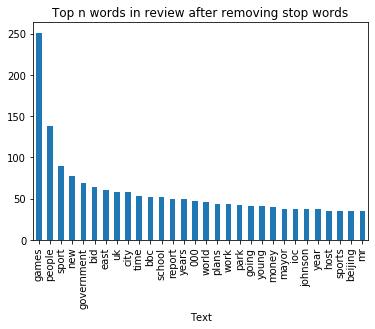

In [73]:
## You can also visualize the same using a plot
common_words = get_top_n_words([content11], get_stopwords(lang), 30)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top n words in review after removing stop words').get_figure().savefig('output.png')

In [150]:
#------------ WRITE CSV WITH DATA ----------------#

import csv
from itertools import zip_longest

#-------- entire dataset-------#

#TOP N WORDS ENTIRE DATASET
list0 = get_top_n_words([content1+content2+content3+content4+content5+content6+content7+content8+content9+content10+content11+content12+content13+content14+content15+content16+content17+content18], get_stopwords(lang), 50)

#TOP N BIGRAM ENTIRE DATASET
listbi = get_top_n_bigram([content1+content2+content3+content4+content5+content6+content7+content8+content9+content10+content11+content12+content13+content14+content15+content16+content17+content18], get_stopwords(lang), 50)

#TOP N WORDS TFIDF (TOP RELEVANT) FOR THE ENTIRE DATASET
listrel = get_top_n_words_tfidf([content1+content2+content3+content4+content5+content6+content7+content8+content9+content10+content11+content12+content13+content14+content15+content16+content17+content18], get_stopwords(lang), 50)


#-------- per group: news/gov/activist-------#

#TOP N WORDS FOR NEWS/TOP N BIGRAM FOR NEWS
list0n = get_top_n_words([content1+content2+content3+content6+content7+content8+content9+content11+content12+content13+content14+content16+content17+content18+content19], get_stopwords(lang), 50)
listbin = get_top_n_bigram([content1+content2+content3+content6+content7+content8+content9+content11+content12+content13+content14+content16+content17+content18+content19], get_stopwords(lang), 50)

#TOP N WORDS FOR GOV/TOP N BIGRAM FOR GOV
list0g = get_top_n_words([content10+content15], get_stopwords(lang), 50)
listbig = get_top_n_bigram([content10+content15], get_stopwords(lang), 50)

#TOP N WORDS FOR ACTIVIST WEBSITES
list0a = get_top_n_words([content4+content5], get_stopwords(lang), 50)
listbia = get_top_n_bigram([content4+content5], get_stopwords(lang), 50)

#-------- per website or media outlet -------#

#TOP N WORDS
list1 = (get_top_n_words([content1], get_stopwords(lang), 50))
list2 = (get_top_n_words([content2], get_stopwords(lang), 50))
list3 = (get_top_n_words([content3], get_stopwords(lang), 50))
list4 = (get_top_n_words([content4], get_stopwords(lang), 50))
list5 = (get_top_n_words([content5], get_stopwords(lang), 50))
list6 = (get_top_n_words([content6], get_stopwords(lang), 50))
list7 = (get_top_n_words([content7], get_stopwords(lang), 50))
list8 = (get_top_n_words([content8], get_stopwords(lang), 50))
list9 = (get_top_n_words([content9], get_stopwords(lang), 50))
list10 = (get_top_n_words([content10], get_stopwords(lang), 50))
list11 = (get_top_n_words([content11], get_stopwords(lang), 50))
list12 = (get_top_n_words([content12], get_stopwords(lang), 50))
list13 = (get_top_n_words([content13], get_stopwords(lang), 50))
list14 = (get_top_n_words([content14], get_stopwords(lang), 50))
list15 = (get_top_n_words([content15], get_stopwords(lang), 50))
list16 = (get_top_n_words([content16], get_stopwords(lang), 50))
list17 = (get_top_n_words([content17], get_stopwords(lang), 50))
list18 = (get_top_n_words([content18], get_stopwords(lang), 50))
list19 = (get_top_n_words([content19], get_stopwords(lang), 50))
list20 = (get_top_n_words([content7+content14], get_stopwords(lang), 50))
list21 = (get_top_n_words([content1+content16], get_stopwords(lang), 50))
list22 = (get_top_n_words([content6+content19], get_stopwords(lang), 50))


#TOP N WORDS

d = [list0, listbi, listrel, list0n, listbin, list0g, listbig, list0a, listbia, list1, list2, list3, list4, list5, list6, list7, list8, list9, list10, list11, list12, list13, list14, list15, list16, list17, list18, list19, list20, list21, list22]
export_data = zip_longest(*d, fillvalue = '')
with open('./data_analysis/' + 'datanalysisexcel2.csv', 'w', newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Top words all", "Top nbigram all", "Top words tfidf", "top news", "top bigram news", "top gov", "top bigram gov", "top activist", "top bigram activist", directory1,directory2,directory3,directory4,directory5,directory6,directory7,directory8,directory9,directory10,directory11,directory12,directory13,directory14,directory15, directory16, directory17, directory18, directory19, "The independent/google+shine", "BBC/google+shine", "Guardian/google+shine"))
      wr.writerows(export_data)
myfile.close()

In [ ]:
#------------ plot charts ----------------#

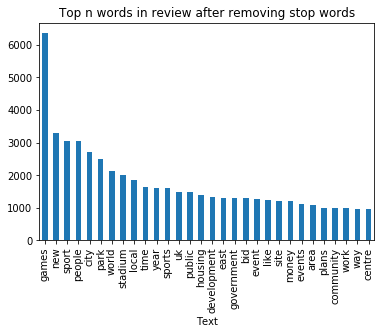

In [108]:
## You can also visualize the same using a plot
common_words = get_top_n_words([content1+content2+content3+content4+content5+content6+content7+content8+content9+content10+content11+content12+content13+content14+content15], get_stopwords(lang), 30)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top n words in review after removing stop words').get_figure().savefig('output.png')

In [ ]:
get_top_n_words([content7], get_stopwords(lang), 30)